In [4]:
import pandas as pd
import numpy as np

"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

In [68]:
"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [6]:
"PARA IMPORTAR DE IPYNB"
import import_ipynb
import utils

In [7]:
ephemeris = pd.read_csv("../ephemeris2.csv")
ephemeris['hours'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])
MIN = ephemeris['delta (Rt)'].argmin()

In [134]:
def xaxis():
    """
    Generic function to create the appropriate x axis with the times and such
    """
    xticks = range(6,len(ephemeris),24)
    plt.xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    plt.xticks([ephemeris['hours'][i] for i in xticks],
                [ephemeris['datetime_str'][i][-5:] for i in xticks], size=16)

## Distance Plot

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


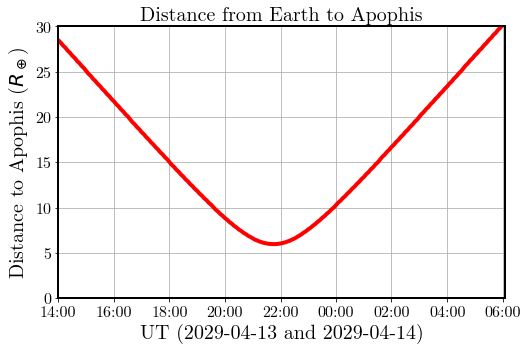

In [8]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Distance from Earth to Apophis",size=20)
ax.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'r-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Distance to Apophis ($R_\oplus$)")
ax.grid()
xaxis()
plt.yticks(size=16)
plt.ylim([0,30])

name = "../Figures/fig1_distance_plot"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Magnitude Plot

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


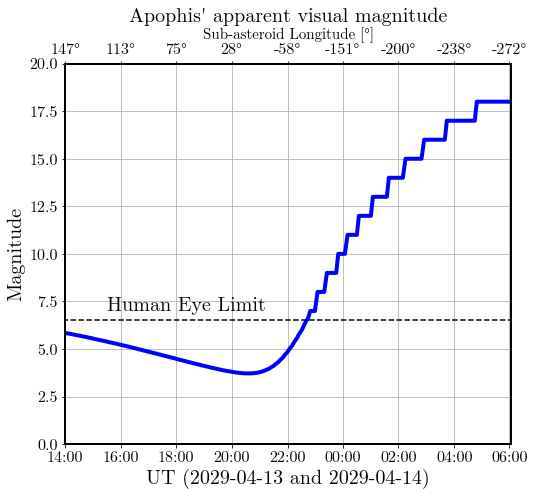

In [101]:
fig,ax = plt.subplots(figsize=(8,7))
ax.set_title(f"Apophis' apparent visual magnitude",size=20)
ax.plot(ephemeris['hours'],ephemeris['V'],'b-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Magnitude")
ax.text(ephemeris['hours'][0]+2,7,"Human Eye Limit",size=20)
ax.grid()
xaxis()

secax = ax.secondary_xaxis('top')
secax.set_xlabel('Sub-asteroid Longitude [°]',size=15)

xticks = range(6,len(ephemeris),24)
secax.set_xticks([ephemeris['hours'][i] for i in xticks])
secax.set_xticklabels([f"{round(ephemeris['Longitude'][i])}°" for i in xticks], size=16)


plt.yticks(size=16)
plt.ylim([0,20])

plt.plot([-10,100],[6.5,6.5],'k--')

name = "../Figures/fig3_magV"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

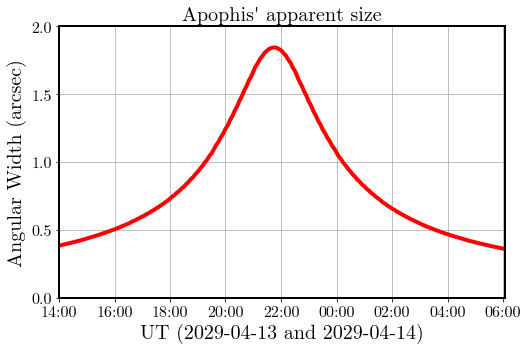

In [10]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxis()
plt.yticks(size=16)
plt.ylim([0,2])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

## Loading Observatory Data

In [11]:
radio =  pd.read_csv("../AllRadiotelescopes.csv").dropna(axis=0,how='all')
# radio

In [12]:
angles = []
for r,row in ephemeris.iterrows():
    angle = utils.size_angle(radio.iloc[0],row)
    angles.append( angle.to(u.arcsec).value )

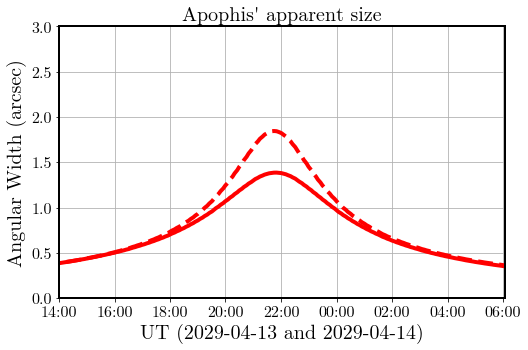

In [13]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],angles,'r-',lw=4)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r--',lw=4)

ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxis()
plt.yticks(size=16)
plt.ylim([0,3])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

In [14]:
radio.Name

0              Canberra DSS-43
1                       Parkes
2                Madrid DSS-63
3                       Lovell
4                   Effelsberg
5                    AVN-Ghana
6                    Goldstone
7                   Green Bank
8             Very Large Array
9                      Arecibo
10                        FAST
11                       EDSCC
12    Usuda Deep Space Center 
Name: Name, dtype: object

In [115]:
pairs = [
    ('GOL','GBT'),
    ('GOL','VLA'),
    ('ARE','GBT'),
    ('MDS','LOV'),
    ('MDS','EFE'),
    ('MDS','AVN'),
    ('CDS','PRK'),
    ('ECD','FAS'),
    ('USU','FAS'),
]

radio_pairs = [
    (radio[radio.Code == a].iloc[0],
    radio[radio.Code == b].iloc[0])
     for a,b in pairs
     ]

[(x.Name,y.Name) for x,y in radio_pairs]

[('Goldstone', 'Green Bank'),
 ('Goldstone', 'Very Large Array'),
 ('Arecibo', 'Green Bank'),
 ('Madrid DSS-63', 'Lovell'),
 ('Madrid DSS-63', 'Effelsberg'),
 ('Madrid DSS-63', 'AVN-Ghana'),
 ('Canberra DSS-43', 'Parkes'),
 ('EDSCC', 'FAST'),
 ('Usuda Deep Space Center ', 'FAST')]

## Observatory Pairs

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


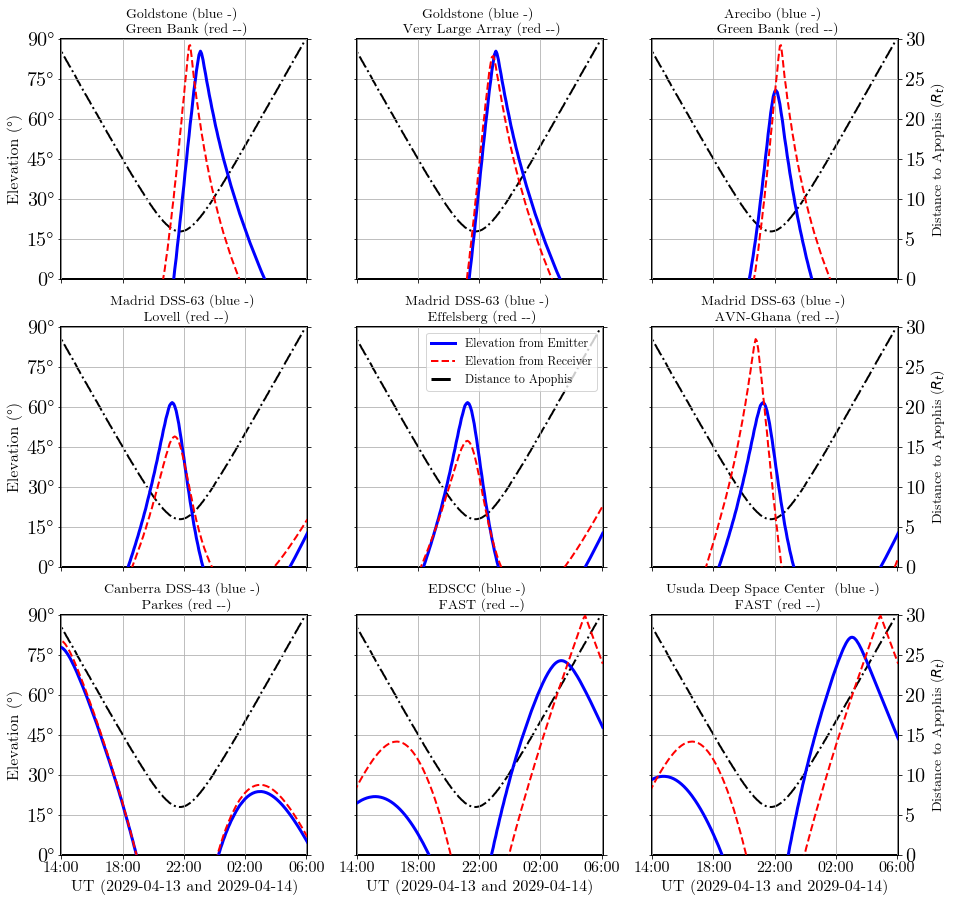

In [116]:
def axes(ax,i):
    ax.grid()
    ax.set_ylim([0,90])
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),48)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)

    if i > 5:
        ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)
        ax.set_xlabel("UT (2029-04-13 and 2029-04-14)",size=16)
    else:
        ax.set_xticklabels([])

    if i%3 == 0:
        ax.set_yticklabels(["%i°"%h for h in yticks])
        ax.set_ylabel("Elevation (°)",size=16)
    else:
        ax.set_yticklabels([])

    if i == 4:
        ax.legend(fontsize=12)

fig, axs = plt.subplots(3,3, figsize=(15,15))
for i,pairobs in enumerate(radio_pairs):
    obs1, obs2 = pairobs
    pair = utils.observatory_pair(obs1,obs2,ephemeris)

    ax = axs.flat[i]
    ax2=ax.twinx()

    ax2.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'k-.',lw=2)
    ax2.set_yticks([])

    ax.set_title(f"{obs1['Name']} (blue -) \n {obs2['Name']} (red --)",size=14)
    ax.plot(ephemeris['hours'],pair['elevation1'],label=f"Elevation from Emitter",lw=3,color='b')
    ax.plot(ephemeris['hours'],pair['elevation2'],'--',label=f"Elevation from Receiver",lw=2,color='r')
    ax.plot([-100],[-100],'k-.',label='Distance to Apophis',lw=3)
    # ax.set_ylabel("Apophis' Elevation (°)",size=14)
    axes(ax,i)

    yticks = list(range(0,31,5))
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([])
    ax2.set_ylim([0,30])

    if (i+1)%3==0:
        ax2.set_ylabel("Distance to Apophis ($R_t$)",size=14)
        ax2.set_yticklabels(yticks)

    ax.set_zorder(ax2.get_zorder()+1)
    ax.set_frame_on(False)

name = "../Figures/fig4_pairs"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Trajectories

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


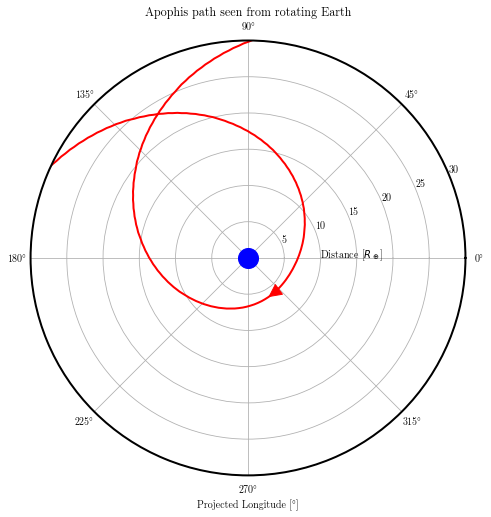

In [67]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(15,8))
line = ax.plot(np.deg2rad(ephemeris['Longitude']),ephemeris['delta (Rt)'],'r-',lw=2)[0]
ax.set_xlabel("Projected Longitude [°]")
ax.text(0.*np.pi/4,10,"Distance [$R_\oplus$]",rotation=0)
ax.set_ylim([0,30])
ax.set_title("Apophis path seen from rotating Earth")
ax.plot(0,0,'bo',ms=20)
add_arrow(line,size=30)
# xticks = np.arange(0,2*np.pi,np.pi/4)
# xtickslabels = ["%i°E"%np.rad2deg(t) if t<=np.pi else "%i°W"%np.rad2deg(abs(t-2*np.pi)) for t in xticks]
# ax.set_xticks(xticks)
# ax.set_xticklabels(xtickslabels)

name = "../Figures/fig7_polar"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

In [72]:
def rotation(ax,N,R,dth):
    line = ax.plot(np.linspace(0,dth,N,endpoint=True),np.ones(N)*R,'b-',lw=2)
    return line

<ipython-input-119-9682b3af9b2a>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{s}h" for s in range(0,25,3)])
<ipython-input-119-9682b3af9b2a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{angle(s)}°" for s in range(0,360,45)])
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


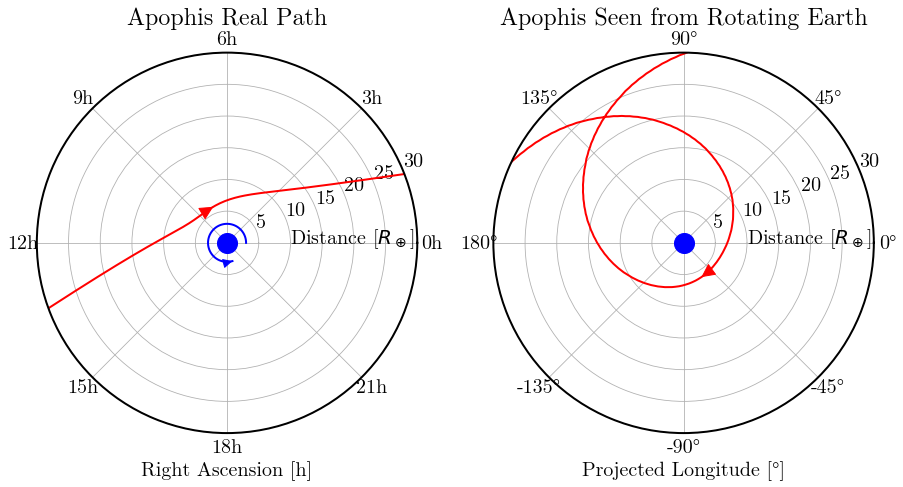

In [119]:
fig, (ax1,ax2) = plt.subplots(1,2,subplot_kw={'projection': 'polar'},figsize=(15,8))

def polar(ax,key,ylabel,title):
    line = ax.plot(np.deg2rad(ephemeris[key]),ephemeris['delta (Rt)'],'r-',lw=2)[0]
    ax.set_xlabel(ylabel)
    ax.text(0.*np.pi/4,10,"Distance [$R_\oplus$]",rotation=0)
    ax.set_ylim([0,30])
    if key == 'RA':
        ax.set_xticklabels([f"{s}h" for s in range(0,25,3)])
        arrow = rotation(ax,100,3,5)[0]
        add_arrow(arrow,size=20,position=4.95)
    else:
        angle = lambda x: x if x<= 180 else x - 360
        ax.set_xticklabels([f"{angle(s)}°" for s in range(0,360,45)])

    ax.set_title(title)
    ax.plot(0,0,'bo',ms=20)
    add_arrow(line,size=30)
    # xticks = np.arange(0,2*np.pi,np.pi/4)
    # xtickslabels = ["%i°E"%np.rad2deg(t) if t<=np.pi else "%i°W"%np.rad2deg(abs(t-2*np.pi)) for t in xticks]
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xtickslabels)

polar(ax1,'RA','Right Ascension [h]','Apophis Real Path')
polar(ax2,'Longitude',"Projected Longitude [°]",'Apophis Seen from Rotating Earth')

name = "../Figures/fig7_polar"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')